## Problem Statement
Charles is a customer at the Borrowme FinTech lending Company and has been laying complaints on how his loan application process has overstayed for months. He is pleading with the company to fast-track the process so he can know his fate. 
It turns out that a long list of customers in the company are just like Charles and the CEO is concerned about this issue.

## Solution
The team at Borrowme has provided historical information containing the information of applicants and the status of their loan application process to us, the DataCatalysts team. We are expected to automate the process by building a machine learning model to predict if there was an outcome of being E-signed or not after the electronic credit facility process is completed.

## Solution Approach
To build a reliable model to solve this problem. The steps we followed are summarized below:
1. Business Understanding
2. Import Data
3. Exploratory Data Analysis
4. Feature Selection
5. Model Building
6. Model Evaluation

## Business Understanding

Overtime, traditional lending companies have been careful with granting loans to borrowers. Because they don't want to offer loans to unworthy people, they go through a time consuming process of evaluating the credit worthiness of would-be borrowers before approving or rejecting their loan application. 

This delay has several negative effects on the borrowers especially when the need for the money is urgent. Imagine if the life of a loved one is at stake or maybe a business contract is at the verge of getting terminated because of lack of funding or this borrower is in a debt that is depressing enough to make him take his life. 

Innovators have looked at this problem and birthed FinTech solutions to solve this. Companies can still carefully pick credit worthy individuals but this time, they will use technologies like Artificial Intelligence to gather the required data for evaluation. But then, even though it seems like it's a bit easier to gather data, this delay problem hasn't been entirely solved. Someone still needs to approve or reject this application as quickly as possible. This can only be done after this *someone* has studied this gathered data and confirmed if this borrower is credit worthy or not. 

The question is, should this still be done by humans when we already have technology? Why can't we just use technology to look through all these applications and immediately confirm if a borrower is credit worthy or not. This is why we, the DataCatalysts team have built a model to predict if an individual is credit worthy or not. 

Our model is predicting credit worthy individuals to get their online applications E-signed while the non-worthy individuals won't have their applications E-signed. 

According to Investopedia, lending companies judge the credit worthiness of borrowers based on these factors:
- Income
- Number and amount of debt
- Capital
- Strength and weakness of the overall economy
- Purpose of loan
- loan repayment length
- credit score
- Collateral

**Some of the items in this list are already present in the provided dataset. Other relevant features will be revealed during the exploratory data analysis process**

Stay tuned!

**Importing Libaries**

In [5]:
# Data wragling libraries
import pandas as pd
import numpy as np

# Data visualization Libaries
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Data modeling and evaluation libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline, make_pipeline

# Ignoring warning
import warnings
warnings.filterwarnings('ignore')


## Import Data

**Loading Data**

In [10]:
train = pd.read_csv('train.csv')
train.head()

,Entry_id,age,pay_schedule,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,...,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed
0,7629673,40,bi-weekly,1,3135,0,3,3,6,2,...,550,36200,0.737398,0.903517,0.487712,0.515977,0.580918,0.380918,10,1
1,5335819,33,semi-monthly,0,3590,0,5,2,2,8,...,1100,53850,0.617361,0.857560,0.613487,0.665523,0.744634,0.744634,12,0
2,8492423,21,weekly,0,2303,0,5,8,2,7,...,600,74850,0.677109,0.758765,0.495609,0.664762,0.592556,0.492556,6,1
3,7948313,26,bi-weekly,0,2795,0,4,4,1,6,...,800,50800,0.738055,0.873204,0.666437,0.700392,0.584130,0.684130,14,1
4,4297036,43,bi-weekly,0,5000,0,2,1,1,2,...,1100,69100,0.798303,0.841747,0.401971,0.568787,0.525905,0.725905,5,1


In [11]:
test = pd.read_csv('test.csv')
test.head()

,Entry_id,age,pay_schedule,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,has_debt,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month
0,3560428,61,weekly,0,3180,0,6,3,2,7,1,600,30150,0.738510,0.881027,0.713423,0.826402,0.730720,0.630720,9
1,6934997,23,weekly,0,1540,6,0,0,7,1,1,450,34550,0.642993,0.766554,0.595018,0.762284,0.531712,0.531712,7
2,5682812,40,bi-weekly,0,5230,0,6,1,2,7,1,700,42150,0.665224,0.960832,0.767828,0.778831,0.792552,0.592552,8
3,6493191,32,semi-monthly,0,5260,3,0,3,1,4,1,1150,64050,0.652429,0.802433,0.593816,0.560389,0.569459,0.369459,3
4,8990111,61,bi-weekly,1,3270,0,4,0,4,3,1,400,61700,0.659736,0.937287,0.852323,0.785698,0.632466,0.732466,7


## Exploratory Data Analysis

In [12]:
# checking the percentage of missing values

def missing_values_tables(df):
    # Total Missing Values
    missing_values = df.isnull().sum()
    
    # Percentage of Missing Values
    missing_value_percent = 100 * (df.isnull().sum()/len(df))
    
    # Make a table with the results
    missing_value_table = pd.concat([missing_values, missing_value_percent], axis = 1)
    
    # Rename the columns 
    missing_values_table_rename_columns = missing_value_table.rename(columns = {0 : 'Missing Values', 1 : '% of Total Values'})
                        
    # Sort the table by percentage of missing descending
    missing_values_table_rename_columns = missing_values_table_rename_columns[missing_values_table_rename_columns.iloc[:,1] != 0].sort_values('% of Total Values', ascending=False).round(1)
    
    # Printing some sumarry information
    print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(missing_values_table_rename_columns.shape[0]) +
              " columns that have missing values.")
                                   
     # Return the dataframe with missing information
    return missing_values_table_rename_columns

In [13]:
missing_values_tables(train)

Your selected dataframe has 21 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


In [14]:
missing_values_tables(test)

Your selected dataframe has 20 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


In [15]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12516 entries, 0 to 12515
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Entry_id              12516 non-null  int64  
 1   age                   12516 non-null  int64  
 2   pay_schedule          12516 non-null  object 
 3   home_owner            12516 non-null  int64  
 4   income                12516 non-null  int64  
 5   months_employed       12516 non-null  int64  
 6   years_employed        12516 non-null  int64  
 7   current_address_year  12516 non-null  int64  
 8   personal_account_m    12516 non-null  int64  
 9   personal_account_y    12516 non-null  int64  
 10  has_debt              12516 non-null  int64  
 11  amount_requested      12516 non-null  int64  
 12  risk_score            12516 non-null  int64  
 13  risk_score_2          12516 non-null  float64
 14  risk_score_3          12516 non-null  float64
 15  risk_score_4       

In [16]:
train.shape

# Observation: There are 12516 rows and 21 columns in the train dataset

(12516, 21)

In [17]:
test.shape

# Observation: There are 5392 rows and 20 columns in the train dataset

(5392, 20)

In [10]:
# Check statistical information of each variable
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Entry_id,12516.0,5.599485e+06,2.563354e+06,1.111398e+06,3.376885e+06,5.608376e+06,7.803325e+06,9.999874e+06
age,12516.0,4.302677e+01,1.186589e+01,1.800000e+01,3.400000e+01,4.200000e+01,5.100000e+01,9.600000e+01
home_owner,12516.0,4.250559e-01,4.943712e-01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
income,12516.0,3.654111e+03,1.508072e+03,9.050000e+02,2.575000e+03,3.255000e+03,4.661250e+03,9.985000e+03
months_employed,12516.0,1.191355e+00,2.404529e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.100000e+01
years_employed,12516.0,3.532998e+00,2.265293e+00,0.000000e+00,2.000000e+00,3.000000e+00,5.000000e+00,1.600000e+01
current_address_year,12516.0,3.593161e+00,2.749211e+00,0.000000e+00,2.000000e+00,3.000000e+00,5.000000e+00,1.200000e+01
personal_account_m,12516.0,3.402205e+00,2.206649e+00,0.000000e+00,2.000000e+00,2.000000e+00,5.000000e+00,1.100000e+01
personal_account_y,12516.0,3.508469e+00,1.959969e+00,0.000000e+00,2.000000e+00,3.000000e+00,4.000000e+00,1.400000e+01
has_debt,12516.0,7.954618e-01,4.033799e-01,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [18]:
# Check the relative frequency of the classes in the target variable: E-signed
train['e_signed'].value_counts(normalize=True)

1    0.540588
0    0.459412
Name: e_signed, dtype: float64

<AxesSubplot:xlabel='e_signed', ylabel='count'>

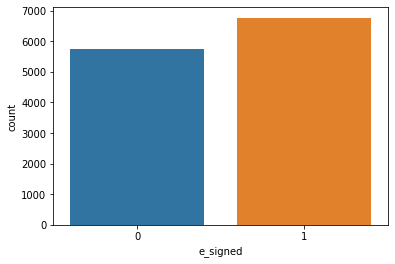

In [19]:
# Visualize the relative frequency of the classes in the target variable: E-signed
sns.countplot(data=train, x='e_signed')

**Observation: The two classes: "E-signed" and "Not E-signed" with figures 1 and 0 respectively have almost the same proportion in the dataset with a little difference of 5%. Having an almost equal proportion will prevent model bias.**

<AxesSubplot:>

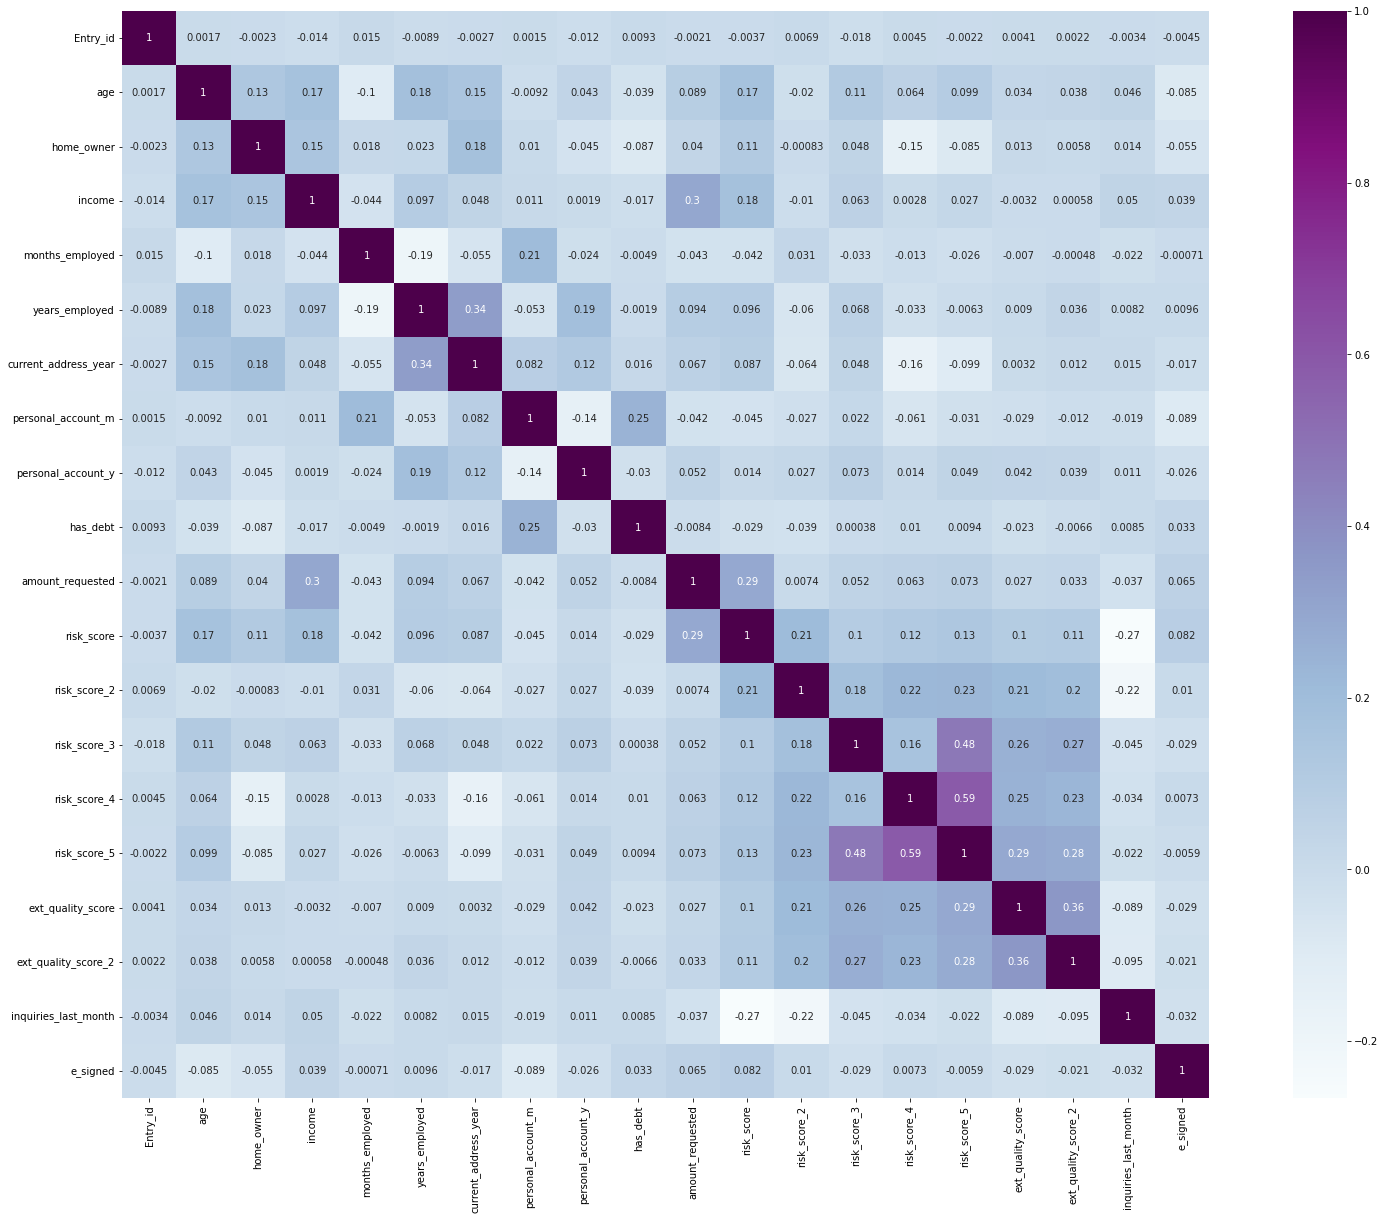

In [17]:
correlations = train.corr()
plt.figure(figsize = (30,20))
sns.heatmap(correlations, square = True, annot = True, cmap = "BuPu")

### Observation on the correlation matrix

All variables have very low correlation with the target variable: E-signed. Hence, we will be going with using all the variables (except risk_score 4 and risk_score 5) in building our model. We made this decision to prevent multicollinearity due to one column correlating with another. And these two variables have the least correlation coefficient to the target variable compared to other risk scores.

Due to our research, we found out that these risk scores are evaluated by different organizations on certain criteria. Choosing all risk scores would cause this multicollinearity due to repetition of judgement. 

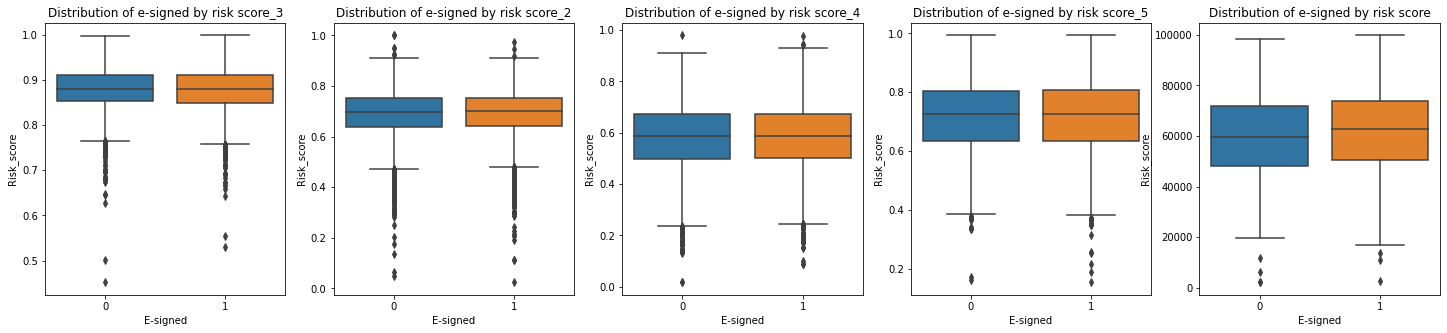

In [18]:
#Create boxplots
plt.figure(figsize = [25, 5])

plt.subplot(1,5,1)

sns.boxplot(data=train, x='e_signed', y='risk_score_3')
plt.xlabel('E-signed')
plt.ylabel('Risk_score')
plt.title('Distribution of e-signed by risk score_3');

plt.subplot(1,5,2)
sns.boxplot(data=train, x='e_signed', y='risk_score_2')
plt.xlabel('E-signed')
plt.ylabel('Risk_score')
plt.title('Distribution of e-signed by risk score_2');

plt.subplot(1,5,3)
sns.boxplot(data=train, x='e_signed', y='risk_score_4')
plt.xlabel('E-signed')
plt.ylabel('Risk_score')
plt.title('Distribution of e-signed by risk score_4');

plt.subplot(1,5,4)
sns.boxplot(data=train, x='e_signed', y='risk_score_5')
plt.xlabel('E-signed')
plt.ylabel('Risk_score')
plt.title('Distribution of e-signed by risk score_5');

plt.subplot(1,5,5)
sns.boxplot(data=train, x='e_signed', y='risk_score')
plt.xlabel('E-signed')
plt.ylabel('Risk_score')
plt.title('Distribution of e-signed by risk score');

### Observation on distribution of the risk_scores

All different risk scores have almost same distribution when those that are E-signed and not E-signed are compared. The differences are minute. However, their outliers seems to have huge differences. 

## Asking questions

The following code will answer some stated questions that will provide more insights to the dataset.

**What proportion of applicants have debts?

Answer: Approximately 80% of applicants already have debt. Most of the applicants already have debt. This could be a sign that they are taking another loan to pay their previous loan Or their previous loan wasn't sufficient for their plans.

This will likely affect their capacity to pay especially if they don't have sufficient income

In [20]:
# Check relative frequency of "has_debt" variable
train['has_debt'].value_counts(normalize=True)

1    0.795462
0    0.204538
Name: has_debt, dtype: float64

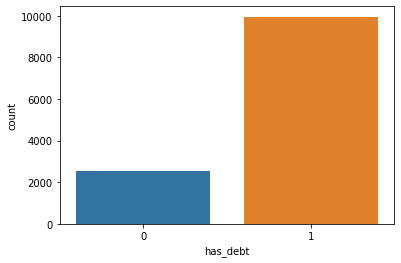

In [13]:
# Visualize the proportion of "has_debt" variable
sns.countplot(data=train, x='has_debt');

**What is the distribution of the pay_schedule variable?**

In [14]:
train['pay_schedule'].value_counts()

bi-weekly       7447
weekly          2627
semi-monthly    1388
monthly         1054
Name: pay_schedule, dtype: int64

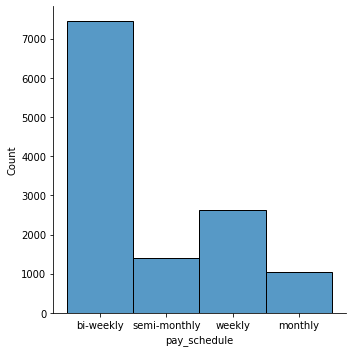

In [15]:
sns.displot(data=train, x='pay_schedule');

**How many applicants own and have their homes on rent?**

Answer: Approximately 57% of applicants have rented homes while 42% own their homes. Though there's a gap between these two classes, it's not significantly high to make a good judgement.

In [22]:
train['home_owner'].value_counts(normalize=True)

0    0.574944
1    0.425056
Name: home_owner, dtype: float64

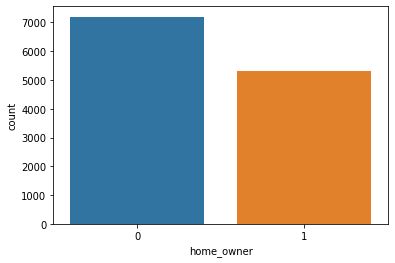

In [16]:
sns.countplot(data=train, x='home_owner');

**Are people with certain pay_schedule more likely to have their application signed?

Answer: Looking at the figures below, there's no significant gap between the different schedules.

In [21]:
# check the relative frequency of the pay_schedule variable
train.groupby('pay_schedule')['e_signed'].mean()

pay_schedule
bi-weekly       0.533235
monthly         0.533207
semi-monthly    0.574928
weekly          0.546250
Name: e_signed, dtype: float64

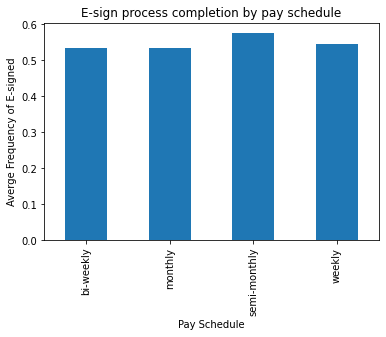

In [22]:
# Visualize the relative frequency of the pay_schedule
train.groupby('pay_schedule')['e_signed'].mean().plot(kind='bar', xlabel='Pay Schedule', ylabel='Averge Frequency of E-signed', title = 'E-sign process completion by pay schedule');

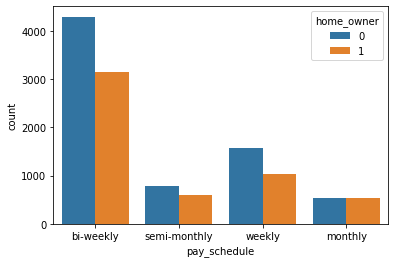

In [23]:
sns.countplot(data=train, x='pay_schedule', hue='home_owner');

**Are people who have debt more likely to complete the e-sign process?

Answer: Those that have debt are more likely to have their application completed. This could be because most applicants already have debt and might not really be a determining factor to having their application signed.

In [24]:
train.groupby('has_debt')['e_signed'].mean()

has_debt
0    0.508203
1    0.548915
Name: e_signed, dtype: float64

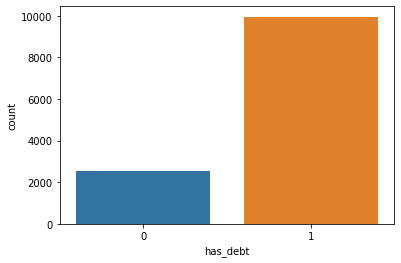

In [23]:
sns.countplot(data=train, x='has_debt');

**Does age affect the e-sign process?

In [25]:
train.groupby('age')['e_signed'].mean()

age
18    0.636364
19    0.514286
20    0.634615
21    0.732143
22    0.637255
        ...   
85    0.000000
86    0.000000
87    1.000000
89    0.000000
96    0.000000
Name: e_signed, Length: 72, dtype: float64

#### Create another column to modify the age into age groups 

In [26]:
train['age_group'] = pd.cut(x=train['age'], bins=[10, 19, 29, 39, 49, 59, 69, 79, 89, 99])
train['age_group'].head()

0    (39, 49]
1    (29, 39]
2    (19, 29]
3    (19, 29]
4    (39, 49]
Name: age_group, dtype: category
Categories (9, interval[int64, right]): [(10, 19] < (19, 29] < (29, 39] < (39, 49] ... (59, 69] < (69, 79] < (79, 89] < (89, 99]]

In [27]:
test['age_group'] = pd.cut(x=test['age'], bins=[10, 19, 29, 39, 49, 59, 69, 79, 89, 99])
test['age_group'].head()

0    (59, 69]
1    (19, 29]
2    (39, 49]
3    (29, 39]
4    (59, 69]
Name: age_group, dtype: category
Categories (9, interval[int64, right]): [(10, 19] < (19, 29] < (29, 39] < (39, 49] ... (59, 69] < (69, 79] < (79, 89] < (89, 99]]

In [28]:
#Create a pivot table of age group and target feature
agegroup_pivot = pd.pivot_table(
    train, index='age_group', values='e_signed', aggfunc= np.mean
).sort_values(by='e_signed')
agegroup_pivot

,e_signed
age_group,
"(89, 99]",0.000000
"(69, 79]",0.386076
"(79, 89]",0.392857
"(59, 69]",0.446939
"(49, 59]",0.518447
"(39, 49]",0.538010
"(10, 19]",0.561404
"(29, 39]",0.565677
"(19, 29]",0.600489


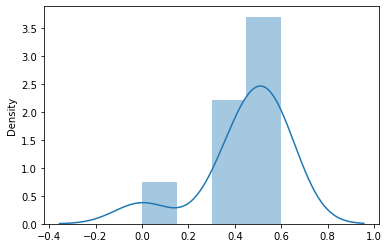

In [29]:
sns.distplot(agegroup_pivot);

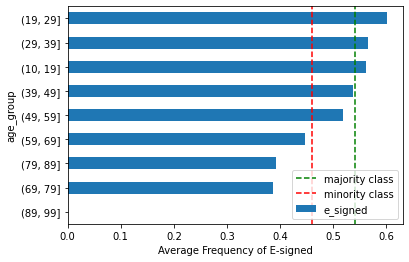

In [30]:
#Create a barchart with the pivot table
agegroup_pivot.plot(kind="barh", legend=None)
plt.axvline(
    majority_class_prop, linestyle="--", color="green", label="majority class"
)
plt.axvline(
    minority_class_prop, linestyle="--", color="red", label="minority class"
)
plt.xlabel('Average Frequency of E-signed')
plt.legend(loc="lower right");

### This shows that younger age groups have the propensity to have their applications signed

**Are home owners more likely to complete the e_sign process?

Answer: The applicants that have rented homes are more likely to have their applications signed.

In [31]:
#create a pivot table 
owner_pivot = pd.pivot_table(
    train, index='home_owner', values='e_signed', aggfunc= np.mean
).sort_values(by='e_signed')
owner_pivot

,e_signed
home_owner,
1,0.508835
0,0.564063


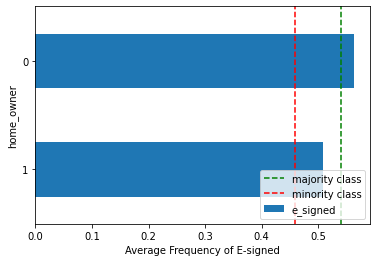

In [32]:
#Create a barchart with the pivot table
owner_pivot.plot(kind="barh", legend=None)
plt.axvline(
    majority_class_prop, linestyle="--", color="green", label="majority class"
)
plt.axvline(
    minority_class_prop, linestyle="--", color="red", label="minority class"
)
plt.xlabel('Average Frequency of E-signed')
plt.legend(loc="lower right");

**How does employment years affect the e-sign process?

Answer: The applicants with two and three years of employment have much applications signed. This might not mean that they are more likely to have the applications signed. This might mean that most applicants belong in this category. 

A look at our probability chart below shows that those with very high employment years have more probability to get their application signed.

In [33]:
train['years_employed'].value_counts()

2     2684
3     2481
1     1692
5     1383
6     1372
4     1315
0      484
7      424
9      265
10     206
8      155
11      30
12      12
13       6
14       3
15       2
16       2
Name: years_employed, dtype: int64

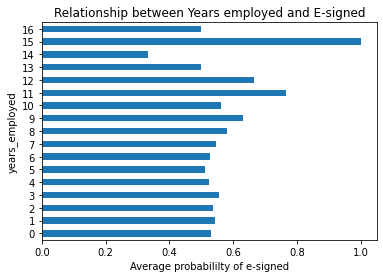

In [34]:
train.groupby('years_employed')['e_signed'].mean().plot(kind='barh', title='Relationship between Years employed and E-signed')
plt.xlabel('Average probabililty of e-signed');

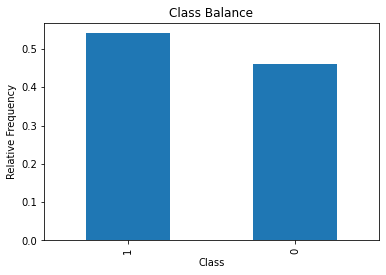

In [19]:
#create a barchart showing the relative frequencies of the two classes of target feature
train['e_signed'].value_counts(normalize=True).plot(kind='bar', xlabel='Class', ylabel='Relative Frequency', title='Class Balance');

In [20]:
#Create two variables from the target feature
#majority_class_prop and minority_class_prop
majority_class_prop, minority_class_prop = train['e_signed'].value_counts(normalize=True)
print(majority_class_prop, minority_class_prop)

0.5405880472994566 0.4594119527005433


In [35]:
train.head()

,Entry_id,age,pay_schedule,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,...,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed,age_group
0,7629673,40,bi-weekly,1,3135,0,3,3,6,2,...,36200,0.737398,0.903517,0.487712,0.515977,0.580918,0.380918,10,1,"(39, 49]"
1,5335819,33,semi-monthly,0,3590,0,5,2,2,8,...,53850,0.617361,0.857560,0.613487,0.665523,0.744634,0.744634,12,0,"(29, 39]"
2,8492423,21,weekly,0,2303,0,5,8,2,7,...,74850,0.677109,0.758765,0.495609,0.664762,0.592556,0.492556,6,1,"(19, 29]"
3,7948313,26,bi-weekly,0,2795,0,4,4,1,6,...,50800,0.738055,0.873204,0.666437,0.700392,0.584130,0.684130,14,1,"(19, 29]"
4,4297036,43,bi-weekly,0,5000,0,2,1,1,2,...,69100,0.798303,0.841747,0.401971,0.568787,0.525905,0.725905,5,1,"(39, 49]"


In [36]:
train.drop(columns=['age',], inplace=True)
test.drop(columns=['age',], inplace=True)

In [37]:
train[['age_group']] = train[['age_group']].astype('object')
test[['age_group']] = test[['age_group']].astype('object')

In [38]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12516 entries, 0 to 12515
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Entry_id              12516 non-null  int64  
 1   pay_schedule          12516 non-null  object 
 2   home_owner            12516 non-null  int64  
 3   income                12516 non-null  int64  
 4   months_employed       12516 non-null  int64  
 5   years_employed        12516 non-null  int64  
 6   current_address_year  12516 non-null  int64  
 7   personal_account_m    12516 non-null  int64  
 8   personal_account_y    12516 non-null  int64  
 9   has_debt              12516 non-null  int64  
 10  amount_requested      12516 non-null  int64  
 11  risk_score            12516 non-null  int64  
 12  risk_score_2          12516 non-null  float64
 13  risk_score_3          12516 non-null  float64
 14  risk_score_4          12516 non-null  float64
 15  risk_score_5       

In [39]:
#pay_schedule encoding
pay_schedule_dummies_train = pd.get_dummies(train['pay_schedule']).add_suffix('_pay_schedule')
train = pd.concat([train,pay_schedule_dummies_train],axis=1).drop('pay_schedule',axis=1)

pay_schedule_dummies_test = pd.get_dummies(test['pay_schedule']).add_suffix('_pay_schedule')
test = pd.concat([test,pay_schedule_dummies_test],axis=1).drop('pay_schedule',axis=1)

# age_group encoding
age_group_dummies_train = pd.get_dummies(train['age_group']).add_suffix('_age_group')
train = pd.concat([train,age_group_dummies_train],axis=1).drop('age_group',axis=1)

age_group_dummies_test = pd.get_dummies(test['age_group']).add_suffix('_age_group')
test = pd.concat([test,age_group_dummies_test],axis=1).drop('age_group',axis=1)


In [40]:
test.shape

(5392, 30)

In [41]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12516 entries, 0 to 12515
Data columns (total 32 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Entry_id                   12516 non-null  int64  
 1   home_owner                 12516 non-null  int64  
 2   income                     12516 non-null  int64  
 3   months_employed            12516 non-null  int64  
 4   years_employed             12516 non-null  int64  
 5   current_address_year       12516 non-null  int64  
 6   personal_account_m         12516 non-null  int64  
 7   personal_account_y         12516 non-null  int64  
 8   has_debt                   12516 non-null  int64  
 9   amount_requested           12516 non-null  int64  
 10  risk_score                 12516 non-null  int64  
 11  risk_score_2               12516 non-null  float64
 12  risk_score_3               12516 non-null  float64
 13  risk_score_4               12516 non-null  flo

**Model Building**

In [42]:
train.rename(columns={'(10, 19]_age_group': '10to19_age_group', '(19, 29]_age_group': '19to29_age_group',
                  '(29, 39]_age_group': '29to39_age_group', '(39, 49]_age_group': '39to49_age_group',
                  '(49, 59]_age_group': '49to59_age_group', '(59, 69]_age_group': '59to69_age_group',
                  '(69, 79]_age_group': '69to79_age_group', '(79, 89]_age_group': '79to89_age_group'}, inplace=True)

test.rename(columns={'(10, 19]_age_group': '10to19_age_group', '(19, 29]_age_group': '19to29_age_group',
                  '(29, 39]_age_group': '29to39_age_group', '(39, 49]_age_group': '39to49_age_group',
                  '(49, 59]_age_group': '49to59_age_group', '(59, 69]_age_group': '59to69_age_group',
                  '(69, 79]_age_group': '69to79_age_group', '(79, 89]_age_group': '79to89_age_group'}, inplace=True)

In [43]:
# Model building
train.drop(columns=['(89, 99]_age_group',], inplace=True)
train.columns = train.columns.astype(str)
test.columns = test.columns.astype(str)
X = train.drop(['e_signed'], axis = 1)
y = train['e_signed']


In [44]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split (X,y,test_size=0.2,random_state=123)

**Logistic Regression Model**

In [45]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(random_state = 1)
LR.fit(X_train, y_train)

LogisticRegression(random_state=1)

In [46]:
acc_train = accuracy_score(y_train, LR.predict(X_train))
acc_test = LR.score(X_test, y_test)

print("Training Accuracy:", round(acc_train, 4))
print("Test Accuracy:", round(acc_test, 4))

Training Accuracy: 0.5428
Test Accuracy: 0.5515


In [47]:
prediction = LR.predict(test)
prediction

array([1, 1, 1, ..., 1, 1, 1])

In [48]:
result = {'Entry_id': test['Entry_id'], 'e_signed': prediction}
result = pd.DataFrame(result)

In [49]:
result.to_csv('LR.csv', index = False)

**Random Forest Model**

In [50]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(random_state = 1)
RF.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

In [51]:
acc_train = accuracy_score(y_train, RF.predict(X_train))
acc_test = RF.score(X_test, y_test)

print("Training Accuracy:", round(acc_train, 4))
print("Test Accuracy:", round(acc_test, 4))

Training Accuracy: 1.0
Test Accuracy: 0.6042


In [52]:
prediction = RF.predict(test)
prediction

array([0, 1, 1, ..., 0, 1, 1])

In [53]:
result = {'Entry_id': test['Entry_id'], 'e_signed': prediction}
result = pd.DataFrame(result)

In [54]:
result.to_csv('RF.csv', index = False)

**XGBOOST Model**

In [91]:
import xgboost as xgb
xgb = xgb.XGBClassifier(subsample= 1.0, min_child_weight= 5, max_depth=5, gamma= 5, colsample_bytree=0.6)
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.6,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=5, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=5,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [92]:
acc_train = accuracy_score(y_train, xgb.predict(X_train))
acc_test = xgb.score(X_test, y_test)

print("Training Accuracy:", round(acc_train, 4))
print("Test Accuracy:", round(acc_test, 4))

Training Accuracy: 0.7601
Test Accuracy: 0.6382
[09:01:02] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV 1/5] END colsample_bytree=1.0, gamma=5, max_depth=3, min_child_weight=5, subsample=1.0;, score=0.670 total time=   5.1s
[09:01:07] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged w

In [93]:
prediction = xgb.predict(test)
prediction

array([0, 1, 0, ..., 1, 0, 1])

In [94]:
result = {'Entry_id': test['Entry_id'], 'e_signed': prediction}
result = pd.DataFrame(result)

In [95]:
result.to_csv('xgb_hyper.csv', index = False)

**CATBOOST Model**

In [150]:
from catboost import CatBoostClassifier
CB = CatBoostClassifier()
CB.fit(X_train, y_train)

Learning rate set to 0.027552
0:	learn: 0.6912174	total: 6.85ms	remaining: 6.84s
1:	learn: 0.6893959	total: 12.3ms	remaining: 6.15s
2:	learn: 0.6876501	total: 17.5ms	remaining: 5.82s
3:	learn: 0.6852482	total: 26.5ms	remaining: 6.59s
4:	learn: 0.6833925	total: 30.6ms	remaining: 6.1s
5:	learn: 0.6820589	total: 35ms	remaining: 5.81s
6:	learn: 0.6808357	total: 39.9ms	remaining: 5.66s
7:	learn: 0.6796071	total: 44.2ms	remaining: 5.47s
8:	learn: 0.6786137	total: 48.5ms	remaining: 5.34s
9:	learn: 0.6775539	total: 52.4ms	remaining: 5.18s
10:	learn: 0.6764323	total: 55.8ms	remaining: 5.02s
11:	learn: 0.6751055	total: 59.4ms	remaining: 4.89s
12:	learn: 0.6740351	total: 62.3ms	remaining: 4.73s
13:	learn: 0.6726924	total: 65.9ms	remaining: 4.64s
14:	learn: 0.6717074	total: 69.8ms	remaining: 4.58s
15:	learn: 0.6707630	total: 74.4ms	remaining: 4.58s
16:	learn: 0.6697886	total: 78.5ms	remaining: 4.54s
17:	learn: 0.6688537	total: 81.9ms	remaining: 4.47s
18:	learn: 0.6675915	total: 85.9ms	remaining: 4

In [151]:
acc_train = accuracy_score(y_train, CB.predict(X_train))
acc_test = CB.score(X_test, y_test)

print("Training Accuracy:", round(acc_train, 4))
print("Test Accuracy:", round(acc_test, 4))

Training Accuracy: 0.8435
Test Accuracy: 0.6294


In [149]:
prediction = CB.predict(test)
prediction

array([0, 1, 1, ..., 0, 1, 1])

In [145]:
result = {'Entry_id': test['Entry_id'], 'e_signed': prediction}
result = pd.DataFrame(result)

In [146]:
result.to_csv('CB_hyper.csv', index = False)

**LightGB Model**

In [62]:
import lightgbm as lgb
lgbm = lgb.LGBMClassifier()
lgbm.fit(X_train, y_train)

LGBMClassifier()

In [63]:
acc_train = accuracy_score(y_train, lgbm.predict(X_train))
acc_test = lgbm.score(X_test, y_test)

print("Training Accuracy:", round(acc_train, 4))
print("Test Accuracy:", round(acc_test, 4))

Training Accuracy: 0.8422
Test Accuracy: 0.6198


In [69]:
prediction = lgbm.predict(test)
prediction

array([0, 1, 1, ..., 1, 1, 1])

In [70]:
result = {'Entry_id': test['Entry_id'], 'e_signed': prediction}
result = pd.DataFrame(result)

In [71]:
result.to_csv('lgbm.csv', index = False)

#### Hyperparameter Tunning for XGBOOST Model

In [107]:
from datetime import datetime
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import StratifiedKFold
from xgboost import XGBClassifier

In [108]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [109]:
# A parameter grid for XGBoost

params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

In [110]:
xgb = XGBClassifier(learning_rate=0.02, n_estimators=600, objective='binary:logistic',
                    silent=True, nthread=1)

In [111]:
folds = 5
param_comb = 5

skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1001)

random_search = RandomizedSearchCV(xgb, param_distributions=params, n_iter=param_comb, scoring='roc_auc', n_jobs=4, cv=skf.split(X_train, y_train), verbose=3, random_state=1001 )

# Here we go
start_time = timer(None) # timing starts from this point for "start_time" variable
random_search.fit(X_train, y_train)
timer(start_time) # timing ends here for "start_time" variable

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[09:18:53] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.



 Time taken: 0 hours 1 minutes and 3.28 seconds.


In [115]:
print('\n Best hyperparameters:')
print(random_search.best_params_)


 Best hyperparameters:
{'subsample': 1.0, 'min_child_weight': 5, 'max_depth': 5, 'gamma': 5, 'colsample_bytree': 0.6}


In [118]:
from scipy.stats import uniform as sp_randFloat
from scipy.stats import randint as sp_randINT
params = {'depth': sp_randINT(2, 10),
          'learning_rate': sp_randFloat(),
          'iterations': sp_randINT(10,100)
}

In [119]:
CB = CatBoostClassifier()

In [120]:
folds = 5
param_comb = 5

skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1001)

random_search = RandomizedSearchCV(CB, param_distributions=params, n_iter=param_comb, scoring='roc_auc', n_jobs=4, cv=skf.split(X_train, y_train), verbose=3, random_state=1001 )

# Here we go
start_time = timer(None) # timing starts from this point for "start_time" variable
random_search.fit(X_train, y_train)
timer(start_time) # timing ends here for "start_time" variable

Fitting 5 folds for each of 5 candidates, totalling 25 fits
0:	learn: 0.6740368	total: 6.01ms	remaining: 373ms
1:	learn: 0.6640328	total: 8.86ms	remaining: 270ms
2:	learn: 0.6531383	total: 11.4ms	remaining: 227ms
3:	learn: 0.6471728	total: 14ms	remaining: 207ms
4:	learn: 0.6439689	total: 16.7ms	remaining: 193ms
5:	learn: 0.6422180	total: 19.6ms	remaining: 186ms
6:	learn: 0.6384702	total: 21.8ms	remaining: 174ms
7:	learn: 0.6358116	total: 24.5ms	remaining: 168ms
8:	learn: 0.6325506	total: 27.4ms	remaining: 165ms
9:	learn: 0.6297776	total: 30.8ms	remaining: 163ms
10:	learn: 0.6281387	total: 34.3ms	remaining: 162ms
11:	learn: 0.6269827	total: 38.1ms	remaining: 162ms
12:	learn: 0.6239690	total: 41.2ms	remaining: 158ms
13:	learn: 0.6229260	total: 44.3ms	remaining: 155ms
14:	learn: 0.6215390	total: 47.8ms	remaining: 153ms
15:	learn: 0.6184271	total: 51.1ms	remaining: 150ms
16:	learn: 0.6174583	total: 54.1ms	remaining: 146ms
17:	learn: 0.6164139	total: 57.3ms	remaining: 143ms
18:	learn: 0.614

In [121]:
print('\n Best hyperparameters:')
print(random_search.best_params_)


 Best hyperparameters:
{'depth': 5, 'iterations': 63, 'learning_rate': 0.3528052884687256}


#### Stacking

In [166]:
from mlxtend.classifier import StackingClassifier
from sklearn import model_selection

In [167]:
sclf = StackingClassifier(classifiers= [xgb,lgbm,CB],  meta_classifier = RF)

sclf.fit(X_train, y_train).score(X_test, y_test)

print('3-fold cross validation:\n')

for clf, label in zip([xgb,lgbm,CB, sclf], 
                      ['xgb', 
                       'lgbm', 
                       'CB',
                       'sclf']):

    scores = model_selection.cross_val_score(clf, X, y, 
                                              cv=3, scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" 
          % (scores.mean(), scores.std(), label))


[10:09:36] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Learning rate set to 0.027552
0:	learn: 0.6912174	total: 5.04ms	remaining: 5.04s
1:	learn: 0.6893959	total: 8.28ms	remaining: 4.13s
2:	learn: 0.6876501	total: 11.6ms	remaining: 3.84s
3:	learn: 0.6852482	total: 15.4ms	remaining: 3.83s
4:	learn: 0.6833925	total: 20ms	remaining: 3.98s
5:	learn: 0.6820589	total: 24.1ms	remaining: 4s
6:	learn: 0.6808357	total: 28.7ms	remaining: 4.07s
7:	learn: 0.6796071	total: 33.4ms	remaining: 4.14s
8:	learn: 0.6786137	total: 37.9ms	remaining: 4.17s
9:	learn: 0.6775539	total: 42.3ms	remaining: 4.19s
10:	learn: 0.676432

In [168]:
acc_train = accuracy_score(y_train, sclf.predict(X_train))
acc_test = sclf.score(X_test, y_test)

print("Training Accuracy:", round(acc_train, 4))
print("Test Accuracy:", round(acc_test, 4))

Training Accuracy: 0.8498
Test Accuracy: 0.6194


In [169]:
prediction = sclf.predict(test)
prediction

array([0, 1, 1, ..., 0, 1, 1])

In [170]:
result = {'Entry_id': test['Entry_id'], 'e_signed': prediction}
result = pd.DataFrame(result)

result.to_csv('sclf.csv', index = False)